<a href="https://colab.research.google.com/github/natrivera/tidytuesday/blob/main/2022/2022-04-22/tidytuesday_2022_04_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

# Load the regular expression library
import re

# Import the wordcloud library
from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
import nltk


nltk.download('stopwords')

from nltk.corpus import stopwords

import gensim.corpora as corpora

from pprint import pprint


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# load data and show 5 recors
hidden_gems = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-04-26/hidden_gems.csv')
hidden_gems.head()


,vol,date,link_forum,link_twitter,notebook,author_kaggle,title,review,author_name,author_twitter,author_linkedin,notes
0,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/hansjoerg/glmnet-xgboos...,hansjoerg,"Glmnet, XGBoost, and SVM Using tidymodels",A well-structured and documented tutorial on h...,Hansjoerg,https://twitter.com/hansjoerg_me,NaN,NaN
1,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/parulpandey/breathe-ind...,parulpandey,Breathe India: COVID-19 effect on Pollution,A detailed work studying the interaction betwe...,Parul Pandey,https://twitter.com/pandeyparul,https://www.linkedin.com/in/parul-pandey-a5498...,NaN
2,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/jonathanbouchet/u-s-com...,jonathanbouchet,U.S. Commercial Flights Tracker Map,Stunning maps are accompanied by lots of other...,Jonathan Bouchet,NaN,https://www.linkedin.com/in/jonathanbouchet,NaN
3,2,2020-05-19,https://www.kaggle.com/general/152383,https://twitter.com/heads0rtai1s/status/126279...,https://www.kaggle.com/andradaolteanu/unbiased...,andradaolteanu,Unbiased Look on Brazil Wildfires,A well-focused analysis on a globally importan...,Andrada Olteanu,https://twitter.com/andradaolteanuu,https://www.linkedin.com/in/andrada-olteanu-38...,NaN
4,2,2020-05-19,https://www.kaggle.com/general/152383,https://twitter.com/heads0rtai1s/status/126279...,https://www.kaggle.com/tunguz/mnist-2d-t-sne-w...,tunguz,MNIST 2D t-SNE with Rapids,One of the first Notebooks on Kaggle demonstra...,Bojan Tunguz,https://twitter.com/tunguz,https://www.linkedin.com/in/tunguz,NaN


In [ ]:
# show distribution of notebooks by volume
hidden_vol = hidden_gems.groupby('vol').agg(counts=('date','count')).reset_index()
fig = px.line(hidden_vol, x="vol", y="counts")
fig.show()

In [ ]:
hidden_gems['note_text'] = hidden_gems['title'] + '   ' + hidden_gems['review']
hidden_gems['note_text'].head(20)

0     Glmnet, XGBoost, and SVM Using tidymodels   A ...
1     Breathe India: COVID-19 effect on Pollution   ...
2     U.S. Commercial Flights Tracker Map   Stunning...
3     Unbiased Look on Brazil Wildfires   A well-foc...
4     MNIST 2D t-SNE with Rapids   One of the first ...
5     How good does your chocolate taste?   A flavou...
6     The 12 Different Types of Kagglers   A creativ...
7     Shifterator analysis on Animal Crossing review...
8     NYC Schools Race, Attendance Economy   A contr...
9     A deep learning of Deep Learning   A deep meta...
10    German Credit Analysis || A Risk Perspective  ...
11    Kiva Loans EDA part 1 | Interactive Visualizat...
12    Police Policy and the Use of Deadly Force   Th...
13    Zoomable Circle Packing via D3.js in IPython  ...
14    How good is Luka Doncic?   In the style of a d...
15    Chocolate Bar Ratings: Extensive EDA   A nuanc...
16    How big is French Industry? [Data Visualizatio...
17    Food Feed Facts   First-rate findings, fea

Credit to blog post used to create topic models. 
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0



In [ ]:

# Remove punctuation
hidden_gems['note_text'] = hidden_gems['note_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
hidden_gems['note_text'] = hidden_gems['note_text'].map(lambda x: x.lower())

# Print out the first rows of papers
hidden_gems['note_text'].head()

0    glmnet xgboost and svm using tidymodels   a we...
1    breathe india: covid-19 effect on pollution   ...
2    us commercial flights tracker map   stunning m...
3    unbiased look on brazil wildfires   a well-foc...
4    mnist 2d t-sne with rapids   one of the first ...
Name: note_text, dtype: object

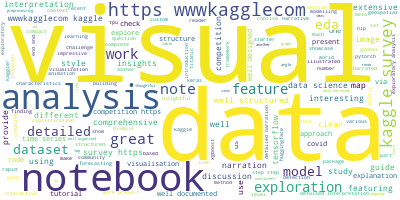

In [ ]:

# Join the different processed titles together.
long_string = ','.join(list(hidden_gems['note_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'wwwkagglecom' , 'kaggle' , 'https'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = hidden_gems.note_text.values.tolist()
data_words = list(sent_to_words(data))


# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['glmnet', 'xgboost', 'svm', 'using', 'tidymodels', 'well', 'structured', 'documented', 'tutorial', 'new', 'tidymodels', 'framework', 'house', 'prizes', 'regression', 'problem']


In [ ]:

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1)]


In [ ]:

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"data" + 0.013*"analysis" + 0.012*"visuals" + 0.011*"well" + '
  '0.010*"features" + 0.010*"work" + 0.010*"detailed" + 0.009*"great" + '
  '0.007*"survey" + 0.007*"extensive"'),
 (1,
  '0.018*"well" + 0.015*"analysis" + 0.014*"notebook" + 0.010*"survey" + '
  '0.010*"detailed" + 0.009*"data" + 0.009*"note" + 0.008*"visuals" + '
  '0.007*"great" + 0.007*"work"'),
 (2,
  '0.015*"data" + 0.012*"notebook" + 0.011*"survey" + 0.009*"visuals" + '
  '0.008*"narration" + 0.008*"great" + 0.007*"analysis" + 0.006*"well" + '
  '0.006*"work" + 0.006*"step"'),
 (3,
  '0.013*"well" + 0.012*"work" + 0.010*"data" + 0.008*"visuals" + '
  '0.006*"detailed" + 0.006*"analysis" + 0.006*"notebook" + 0.006*"maps" + '
  '0.006*"structured" + 0.005*"exploration"'),
 (4,
  '0.026*"data" + 0.014*"visuals" + 0.012*"well" + 0.012*"analysis" + '
  '0.011*"notebook" + 0.011*"survey" + 0.009*"detailed" + 0.009*"note" + '
  '0.008*"work" + 0.007*"exploration"')]
